In [1]:
!cat /home/gdholla1/git_projects/pystain/scripts/plot_ml_clusters.py

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

max_n_components = 6
fwhm = 0.3

sns.set_style('whitegrid')
sns.set_context('poster')

import os
import pandas

import numpy as np
import itertools

from multiprocessing import Pool

import scipy as sp
from scipy import optimize

import pickle as pkl
from pystain import StainDataset

from pystain.cluster import plot_clusters_axial, sort_model_clusters, SimpleExgaussMixture, plot_clusters_coronal, plot_clusters_sagittal

cluster_colors = [sns.light_palette((i * 360 / max_n_components, 90, 60), 256, input="husl") for i in np.arange(max_n_components)]
cluster_cmaps = [sns.light_palette((i * 360 / max_n_components, 90, 60), 256, input="husl", as_cmap=True) for i in np.arange(max_n_components)]

subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]
n_subj = len(subject_ids)

dss = [StainDataset(subject_id, fwhm=fwhm) for subject_id in 

In [2]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

max_n_components = 6
fwhm = 0.3

sns.set_style('whitegrid')
sns.set_context('poster')

import os
import pandas

import numpy as np
import itertools

from multiprocessing import Pool

import scipy as sp
from scipy import optimize

import pickle as pkl
from pystain import StainDataset

from pystain.cluster import plot_clusters_axial, sort_model_clusters, SimpleExgaussMixture, plot_clusters_coronal, plot_clusters_sagittal


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
ds = StainDataset(15055, fwhm)

/home/gdholla1/data/post_mortem/new_data_format/15055/images.hdf5
data_smoothed_0.3_thr_0.3 not cached
 *** CALR ***
All slices available for stain CALR!
 *** FER ***
All slices available for stain FER!
 *** GABRA3 ***
All slices available for stain GABRA3!
 *** GAD6567 ***
Slices that are not available for stain GAD6567:
 * slice 150 (can NOT be interpolated)
 * slice 200 (can NOT be interpolated)
 * slice 350 (can be interpolated)
 *** MBP ***
All slices available for stain MBP!
 *** PARV ***
All slices available for stain PARV!
 *** SERT ***
All slices available for stain SERT!
 *** SMI32 ***
Slices that are not available for stain SMI32:
 * slice 700 (can be interpolated)
 *** SYN ***
Slices that are not available for stain SYN:
 * slice 200 (can be interpolated)
 * slice 650 (can be interpolated)
 * slice 1050 (can be interpolated)
 *** TH ***
Slices that are not available for stain TH:
 * slice 200 (can be interpolated)
 * slice 350 (can NOT be interpolated)
 * slice 400 (can NOT

/home/gdholla1/git_projects/pystain/pystain/utils.py:19: RuntimeWarning: invalid value encountered in divide
  new_data=VV/WW


Smoothing FER
Smoothing GABRA3
Smoothing GAD6567
Smoothing MBP
Smoothing PARV
Smoothing SERT
Smoothing SMI32
Smoothing SYN
Smoothing TH
Smoothing TRANSF
Smoothing VGLUT1
calculating vmin
calculating vmax


In [6]:
fns = ['/home/gdholla1/data/post_mortem/ml_clusters_v2/15055_0.3_CALR_{n_clusters}.pkl'.format(**locals()) for n_clusters in [1,2,3]]
fns = [fn if os.path.exists(fn) else None for fn in fns]
models = [pkl.load(open(fn)) if fn is not None else None for fn in fns ]

In [18]:
sns.set_context('poster')
sns.set_style('white')

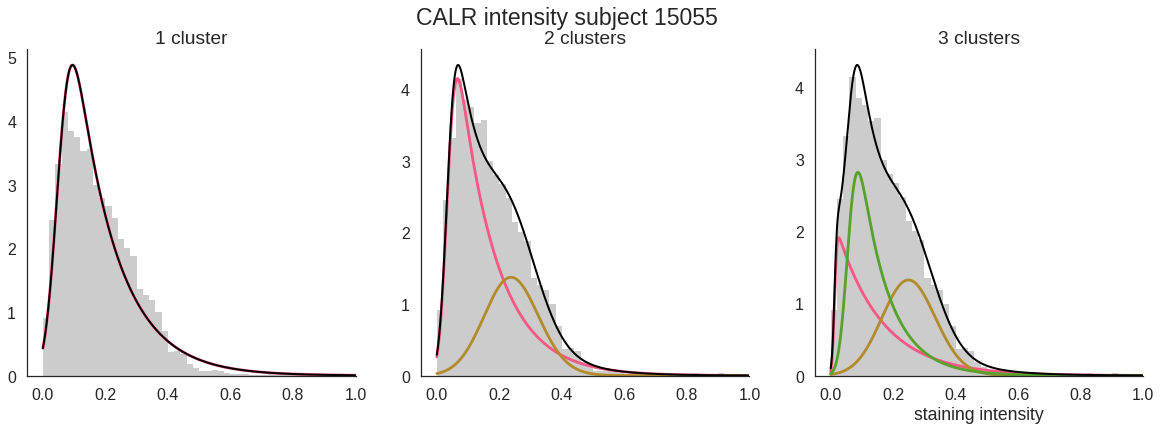

In [22]:
plt.subplot(131)
models[0].plot_fit(colorized=True)
plt.title('1 cluster')

plt.subplot(132)
models[1].plot_fit(colorized=True)
plt.title('2 clusters')

plt.subplot(133)
models[2].plot_fit(colorized=True)
sns.despine()
plt.title('3 clusters')
plt.xlabel('staining intensity')

plt.suptitle('CALR intensity subject 15055')

plt.gcf().set_size_inches((20, 6))

plt.savefig('/home/gdholla1/projects/bias/reports/figures/supplementary_figure_3.pdf')